## Each Users' Initial Posts and Replies
When the task is to evaluate each student's performance, we need to look at each student's number of initial posts and replies which indicates how engaged are they in the topic.

In [2]:
import csv
import collections
data = []
users = []
with open ('2017-5-1.csv', newline = '') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data.append(row)
        users.append(row['user'])
users = list(set(users))
users.sort()

original = [0]*len(users)
reply = [0]*len(users)
for i in range(len(users)):
    for j in range(len(data)):
        # original post the parent is empty string
        if users[i] == data[j]['user'] and data[j]['parent'] == '':
            original[i] += 1
        # replies when the parent is not empty string
        if users[i] == data[j]['user'] and data[j]['parent'] != '':
            reply[i] += 1

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%d' % int(height),
                ha='center', va='bottom', fontsize = 30)
            
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50, 20))
ind = np.arange(len(original))  # the x locations for the groups
width = 0.35  # the width of the bars
ori = ax.bar(ind - width/2, original, width, color='SkyBlue', label='Original')
re = ax.bar(ind + width/2, reply, width, color='IndianRed', label='Reply')
ax.set_ylabel('#', fontsize=50)
ax.set_xlabel('User ID', fontsize=50)
ax.set_title('# of Original Posts and # of Replies for Each User', fontsize=60)
ax.set_xticks(ind)
ax.tick_params(axis='y', labelsize=40)
ax.set_xticklabels(users, fontsize=40,  rotation = 60)
ax.legend(fontsize=50)
autolabel(ori)
autolabel(re)
plt.show()

<Figure size 5000x2000 with 1 Axes>

## Each Post's Correlation Between # of Char and # of Replies
When trying to determine if there is a correlation between the number of text chars and the number of repiles it got, we need to look at the scatterplot with those two variables on x and y axis.

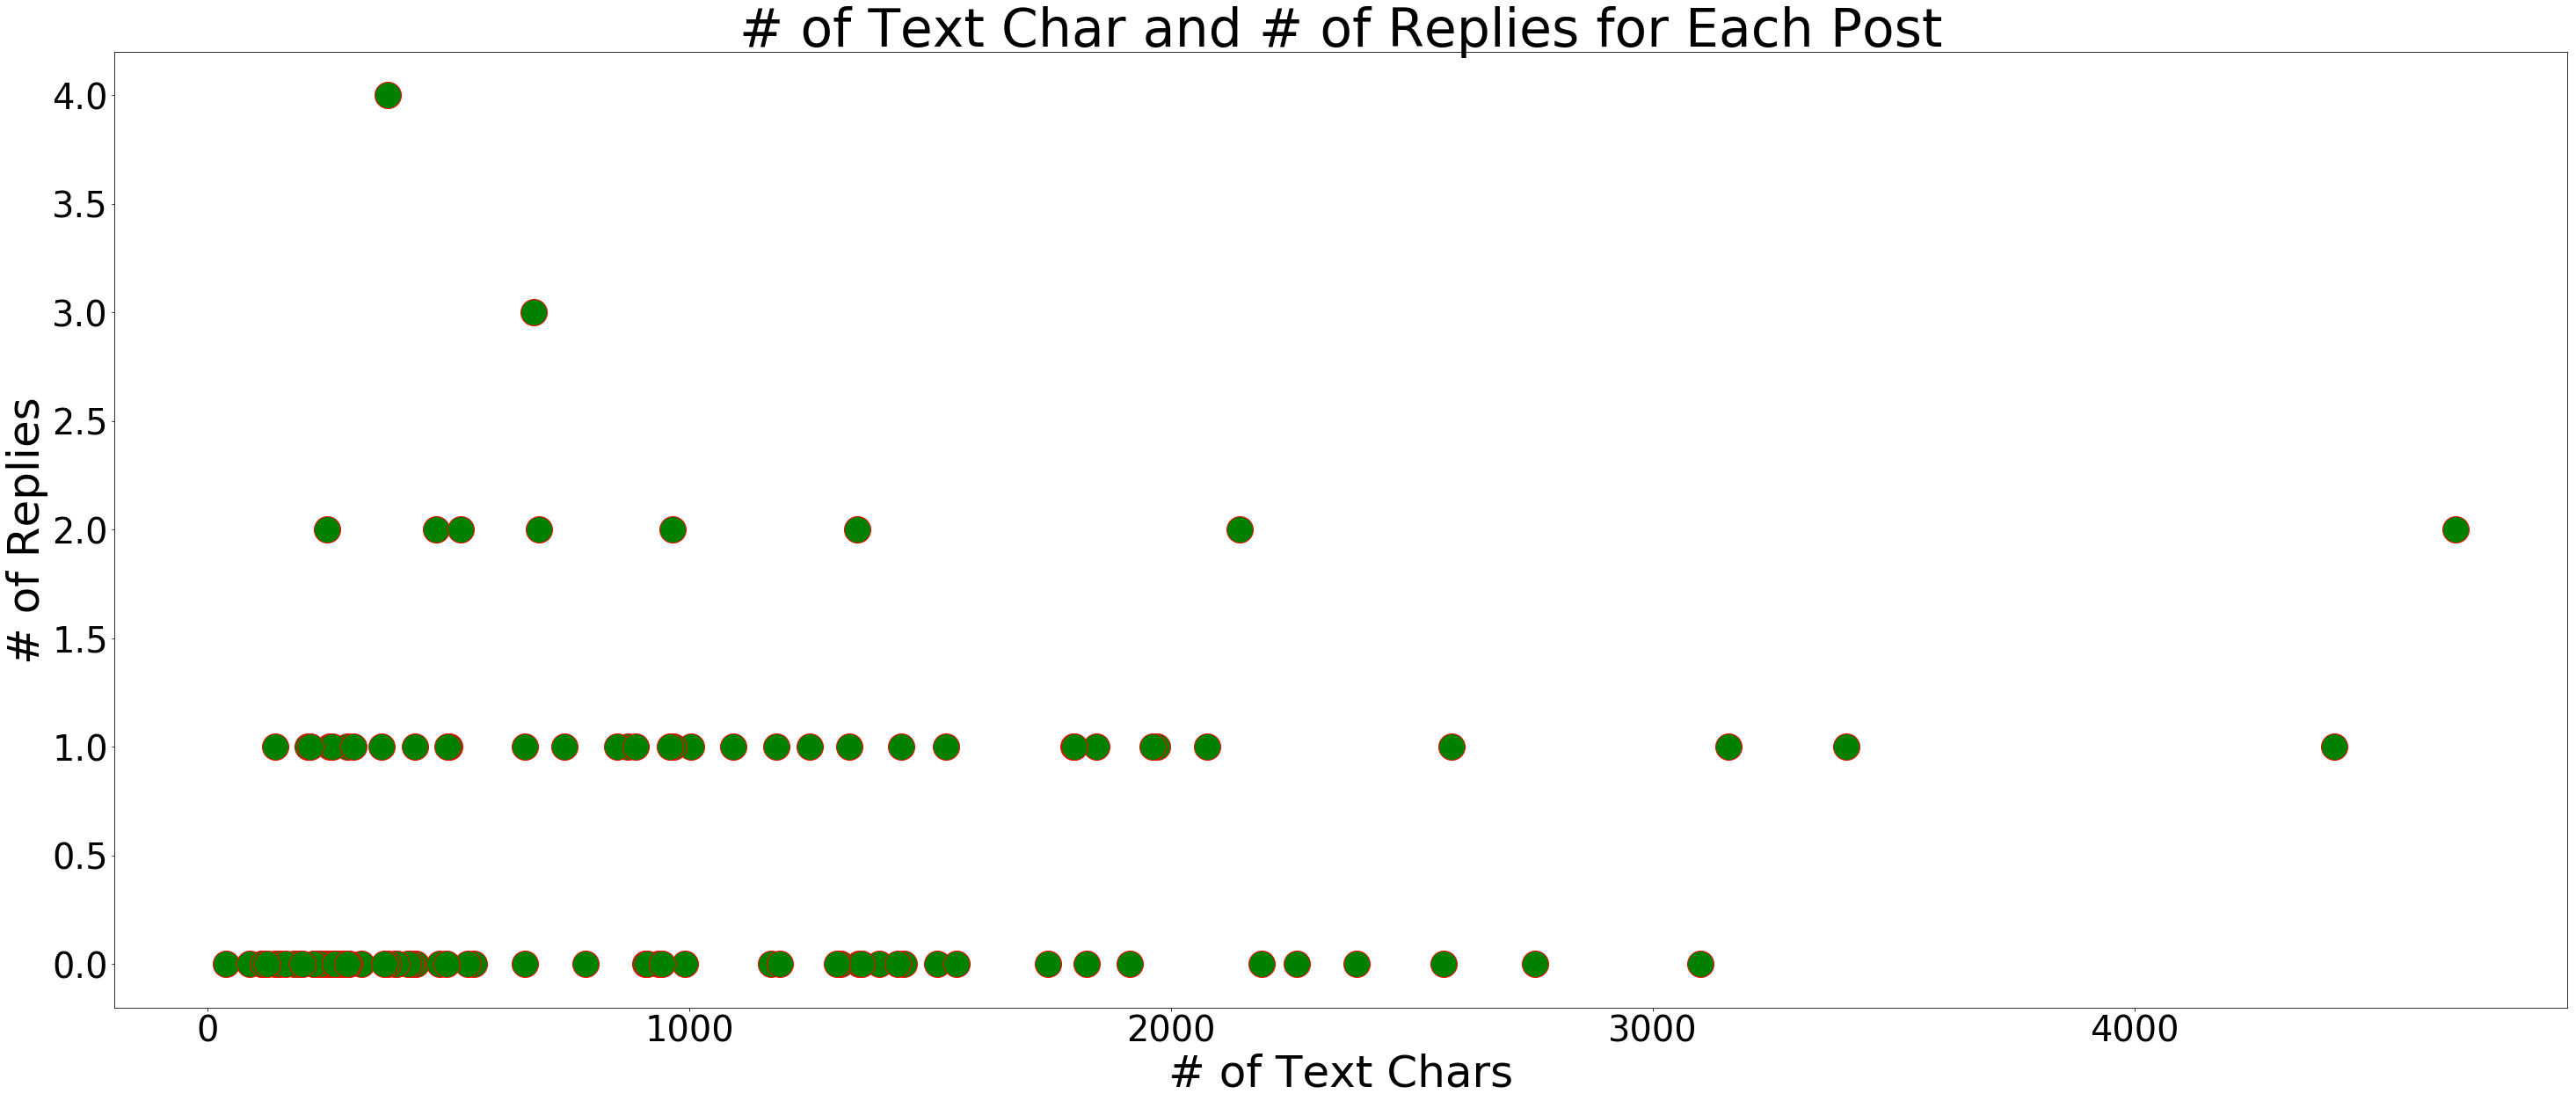

In [3]:
post_id = []
num_char = []
num_children = []
for i in range(len(data)):
    post_id.append(data[i]['id'])
    num_char.append(data[i]['textchars'])
    num_children.append(data[i]['numChildren'])

num_char = list(map(int, num_char))
num_children = list(map(int, num_children))
fig, l = plt.subplots(figsize=(50, 20))
ax = plt.plot(num_char, num_children, 'ro')
l.set_title('# of Text Char and # of Replies for Each Post', fontsize=60)
l.set_ylabel('# of Replies', fontsize=50)
l.set_xlabel('# of Text Chars', fontsize=50)
l.tick_params(axis='x', labelsize=40)
l.tick_params(axis='y', labelsize=40)
plt.setp(ax, markersize=30)
plt.setp(ax, markerfacecolor='Green')
plt.show()

## When Do People Write Their Posts?
When trying to figure out how many posts are posted on each day, we need to look at a bar chart.

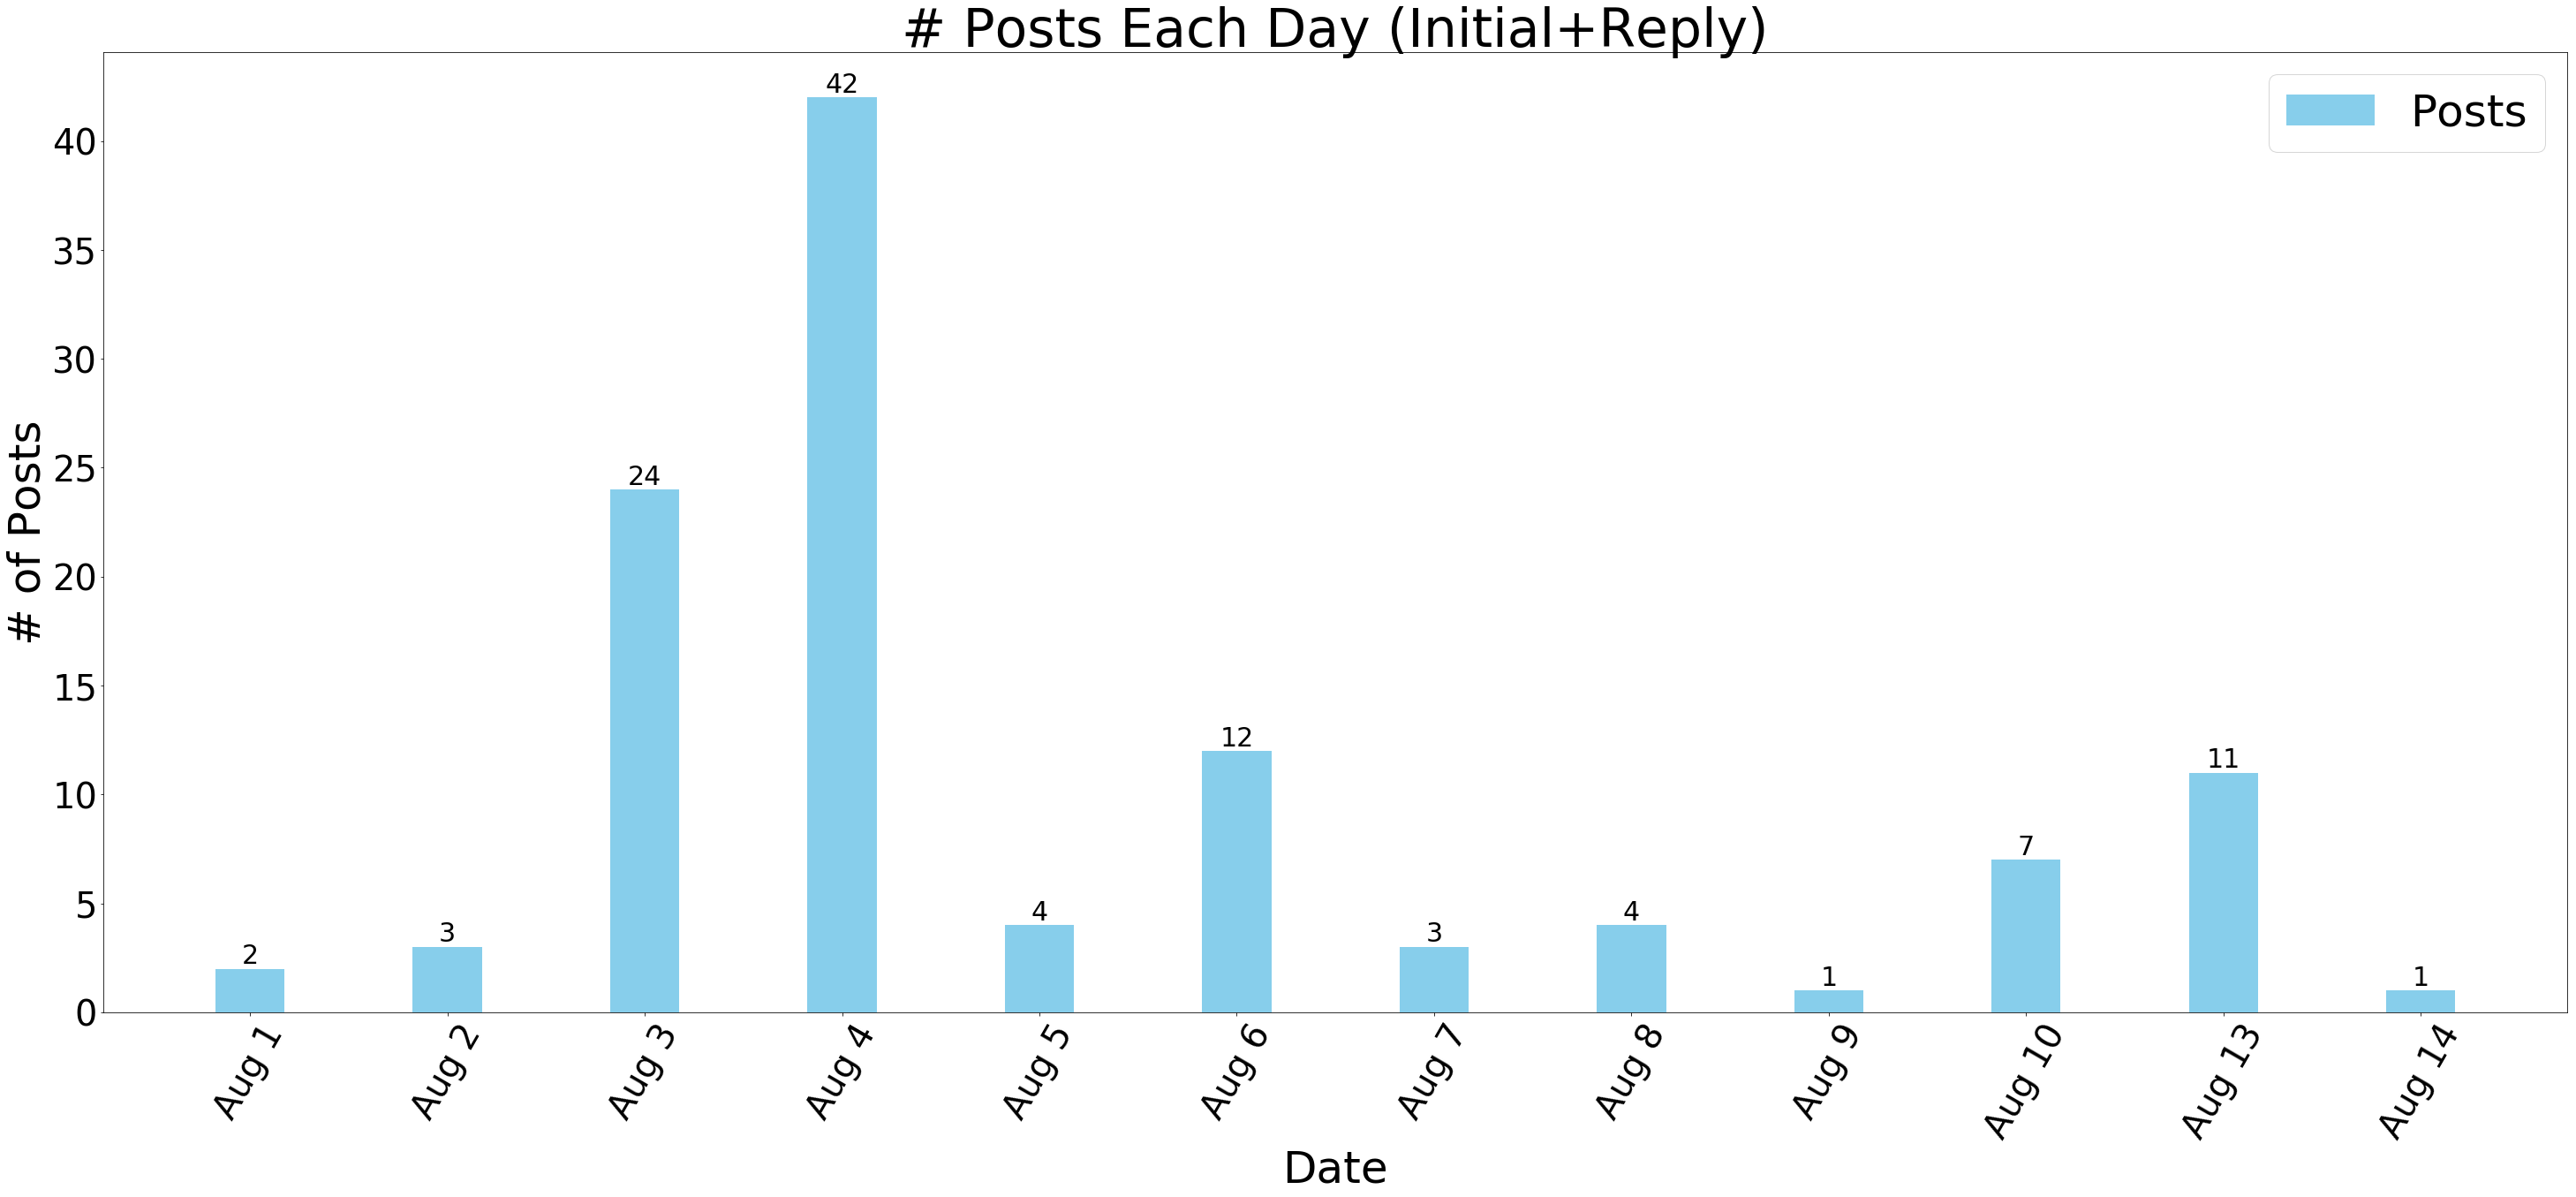

In [4]:
time = []
for row in data:
    tmp = row['time']
    tmp = tmp[8:10]
    time.append(int(tmp))
time = list(set(time))
cnt = [0]*len(time)
for i in range(len(time)):
    for row in data:
        if int(row['time'][8:10]) == time[i]:
            cnt[i] += 1
for i in range(len(time)):
    time[i] = "Aug " + str(time[i])
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(50, 20))
ind = np.arange(len(time))  # the x locations for the groups
width = 0.35  # the width of the bars
counts = ax.bar(ind, cnt, width, color='SkyBlue', label='Posts')
ax.set_ylabel('# of Posts', fontsize=50)
ax.set_xlabel('Date', fontsize=50)
ax.set_title('# Posts Each Day (Initial+Reply)', fontsize=60)
ax.set_xticks(ind)
ax.tick_params(axis='y', labelsize=40)
ax.set_xticklabels(time, fontsize=40,  rotation = 60)
ax.legend(fontsize=50)
autolabel(counts)
plt.show()

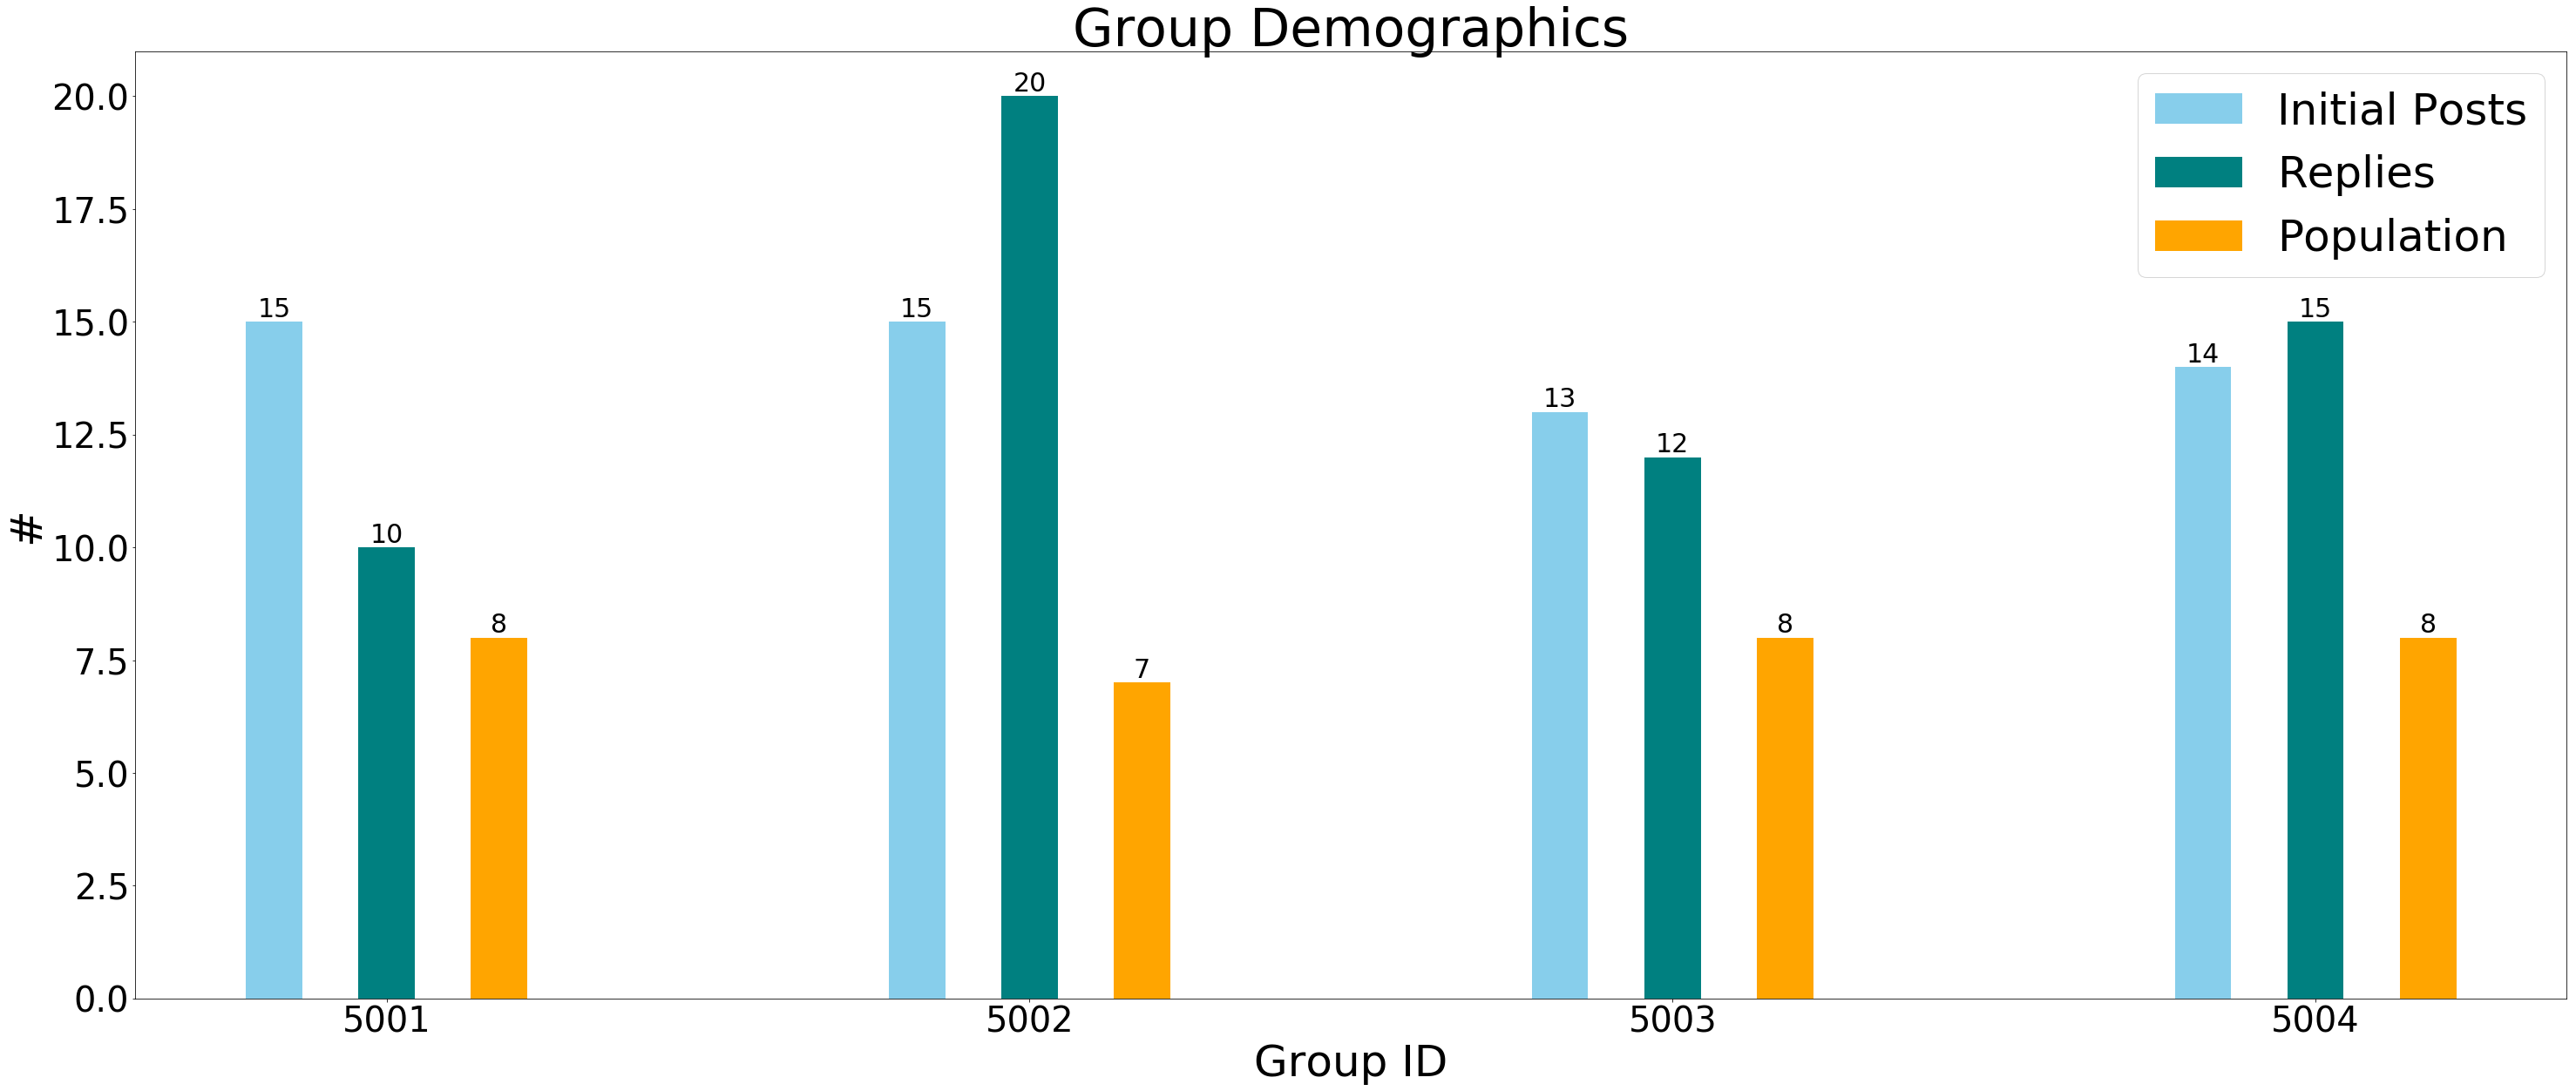

In [5]:
group = []
for row in data:
    group.append(row['groupID'])
group = list(set(group))
group.sort()
group_initial = [0]*len(group)
group_reply = [0]*len(group)
groups_of_users = []
for i in range(len(group)):
    group_users = []
    for row in data:
        if row['groupID'] == group[i] and row['parent'] == '':
            group_initial[i] += 1
        if row['groupID'] == group[i] and row['parent'] != '':
            group_reply[i] += 1
        if row['groupID'] == group[i]:
            group_users.append(row['user'])
    group_users = list(set(group_users))
    group_users.sort()
    groups_of_users.append(group_users)
group_population = []
for row in groups_of_users:
    group_population.append(len(row))

fig, ax = plt.subplots(figsize=(50, 20))
ind = np.arange(len(group))  # the x locations for the groups
width = 0.35  # the width of the bars
g1 = ax.bar(ind - width/2, group_initial, width/4, color='SkyBlue', label='Initial Posts')
g2 = ax.bar(ind, group_reply, width/4, color='Teal', label='Replies')
g3 = ax.bar(ind + width/2, group_population, width/4, color='Orange', label='Population')
ax.set_ylabel('#', fontsize=50)
ax.set_xlabel('Group ID', fontsize=50)
ax.set_title('Group Demographics', fontsize=60)
ax.set_xticks(ind)
ax.tick_params(axis='y', labelsize=40)
ax.set_xticklabels(group, fontsize=40)
ax.legend(fontsize=50)
autolabel(g1)
autolabel(g2)
autolabel(g3)
plt.show()

In [6]:
group_population

[8, 7, 8, 8]

In [7]:
groups_of_users

[['1001', '1002', '1003', '1004', '1005', '1006', '1007', '1008'],
 ['1009', '1010', '1011', '1012', '1013', '1014', '1015'],
 ['1016', '1017', '1018', '1019', '1020', '1021', '1022', '1023'],
 ['1024', '1025', '1026', '1027', '1028', '1029', '1030', '1031']]

In [148]:
d = []
topic_id = []
with open ('2017-5-5.csv', newline = '') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        d.append(row)
        topic_id.append(int(row['topicID']))
topic_id = list(set(topic_id))
topic_id.sort()
topics = [[] for i in range(len(topic_id))]
for i in range(len(topic_id)):
    for row in d:
        if int(row['topicID']) == topic_id[i]:
            topics[i].append(row)

import plotly.plotly as py
import plotly
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='sebastian1995', api_key='D3MbDoZzB8bZyiMPfuX5')
import networkx as nx
G = nx.DiGraph()
edges = []
users = []
for row in topics[0]:
    users.append(row['user'])
    if row['parent'] != '':
        for r in topics[0]:
            if r['id'] == row['parent']:
                parent = r['user']
                edges.append((row['user'], r['user']))
users = list(set(users))
users.sort()

for row in users:
    G.add_node(int(row)-1001)
for row in edges:
    G.add_edge(int(row[0])-1001, int(row[1])-1001)
G_ref=nx.random_geometric_graph(len(G.node()),0.125)
pos=nx.get_node_attributes(G_ref,'pos')
nx.set_node_attributes(G, pos, 'pos')

In [152]:
dmin=1
ncenter=0
for n in pos:
    x,y=pos[n]
    d=(x-0.5)**2+(y-0.5)**2
    if d<dmin:
        ncenter=n
        dmin=d

p=nx.single_source_shortest_path_length(G,ncenter)
edge_trace = go.Scatter(
    x=[],
    y=[],
    line=dict(width=0.5,color='#888'),
    hoverinfo='none',
    mode='lines')

for edge in G.edges():
    x0, y0 = G.node[int(edge[0])]['pos']
    x1, y1 = G.node[edge[1]]['pos']
    edge_trace['x'] += tuple([x0, x1, None])
    edge_trace['y'] += tuple([y0, y1, None])

node_trace = go.Scatter(
    x=[],
    y=[],
    text=[],
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlGnBu',
        reversescale=True,
        color=[],
        size=10,
        colorbar=dict(
            thickness=15,
            title='Node Connections',
            xanchor='left',
            titleside='right'
        ),
        line=dict(width=2)))

for node in G.nodes():
    x, y = G.node[node]['pos']
    node_trace['x'] += tuple([x])
    node_trace['y'] += tuple([y])
    
for node, adjacencies in enumerate(G.adjacency()):
    node_trace['marker']['color']+=tuple([len(adjacencies[1])])
    id = node + 1001
    node_info = 'User ID: ' + str(id) + '<br> # of connections: '+str(len(adjacencies[1]))
    node_trace['text']+=tuple([node_info])
    
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='<br>Users Connections Graph',
                titlefont=dict(size=16),
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False)))

py.iplot(fig, filename='networkx')